# Practica 4

Carlos Saiz Hernández

## Imports

In [7]:

import networkx as nx
import matplotlib.pyplot as plt
import random

## Creamos la red

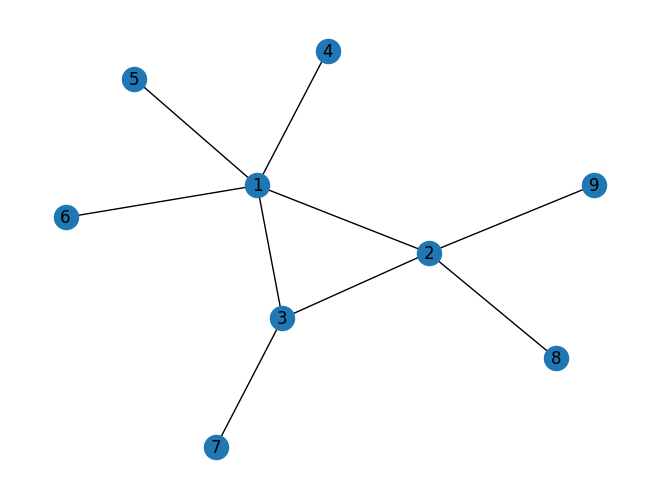

In [8]:
# Creamos la red
redNoDirigida = nx.Graph()

# Insertamos los nodos
redNoDirigida.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])
redNoDirigida.add_edges_from([(1, 4), (1, 5), (1, 6), (1, 3), (1, 2), (2, 3), (2, 8), (2, 9), (3, 7)])

pos = nx.kamada_kawai_layout(redNoDirigida)
nx.draw(redNoDirigida, pos,  with_labels=True)
plt.show()

## Red Aleatoria 

In [9]:
T = 10000


def vacunacion_aleatoria(red, T):
    relaciones_inmunizadas = 0
    for _ in range(T):
        individuo_aleatorio = random.choice(list(red.nodes()))
        vecinos = list(red.neighbors(individuo_aleatorio))
        relaciones_inmunizadas += len(vecinos)
    return relaciones_inmunizadas / T

resultado = vacunacion_aleatoria(redNoDirigida, T)
print(f"Relaciones inmunizadas esperadas (aleatoria): {resultado}")

Relaciones inmunizadas esperadas (aleatoria): 1.9594


In [10]:
def valor_esperado_aleatoria(red):
    total_nodos = red.number_of_nodes()
    total_grados = sum(dict(red.degree()).values())
    return total_grados / total_nodos

valor_esperado = valor_esperado_aleatoria(redNoDirigida)
print(f"Valor esperado de relaciones inmunizadas (aleatoria): {valor_esperado}")

Valor esperado de relaciones inmunizadas (aleatoria): 2.0


## Red Aleatoria indirecta

In [11]:

def vacunacion_aleatoria_indirecta(red, T):
    relaciones_inmunizadas = 0
    for _ in range(T):
        individuo_aleatorio = random.choice(list(red.nodes()))
        vecinos = list(red.neighbors(individuo_aleatorio))
        if vecinos:
            vecino_aleatorio = random.choice(vecinos)
            relaciones_inmunizadas += len(list(red.neighbors(vecino_aleatorio))) - 1
    return relaciones_inmunizadas / T

resultado = vacunacion_aleatoria_indirecta(redNoDirigida, T)
print(f"Relaciones inmunizadas esperadas (aleatoria indirecta): {resultado}")

Relaciones inmunizadas esperadas (aleatoria indirecta): 2.754


In [12]:
def valor_esperado_aleatoria_indirecta(red):
    total_nodos = red.number_of_nodes()
    suma_grados_cuadrados = sum(deg**2 for _, deg in red.degree())
    suma_grados = sum(deg for _, deg in red.degree())
    return (suma_grados_cuadrados - suma_grados) / total_nodos

valor_esperado = valor_esperado_aleatoria_indirecta(redNoDirigida)
print(f"Valor esperado de relaciones inmunizadas (aleatoria indirecta): {valor_esperado}")

Valor esperado de relaciones inmunizadas (aleatoria indirecta): 4.222222222222222


#### ¿Cuál de las dos estrategias parece ser mejor? ¿Por qué?
Según los datos obtenidos parece que la mejor de las estrategias es la aleatoria indirecta, ya que con una diferencia de 0,8 en la cantidad de vacunas realizadas por la aleatoria indirecta, conseguimos más del doble de relaciones inmunizadas 